<a href="https://colab.research.google.com/github/Pgupta1996/Telecom-churn-prediction-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
#Importing Important Libraries For Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 100)

In [4]:
#Importing Dataset
telco_dataset = pd.read_csv("/Telecom_Churn_Analysis.csv")

In [5]:
telco_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
telco_dataset.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
telco_dataset.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
#Information About the Column of Dataset
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
#Finding Basics Stasticis About the training Dataset
telco_dataset['Churn']=telco_dataset['Churn'].astype('str')
telco_dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
telco_dataset['State'].nunique()

51

In [11]:
#Finding all Column Present in the Training Dataset
telco_dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

***Exploratary Data Analysis***

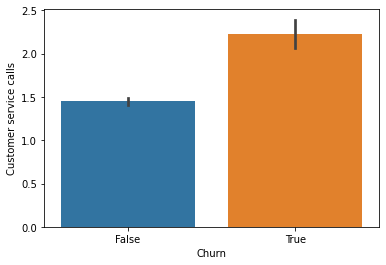

In [12]:
sns.barplot(x='Churn', y='Customer service calls',data=telco_dataset)

In [13]:
print('Total percentage of churn = ',100*telco_dataset[telco_dataset['Churn']=='True'].shape[0]/telco_dataset.shape[0])

Total percentage of churn =  14.491449144914492


In [14]:
li=[]
for name,group in telco_dataset.groupby(['State','Churn']):
    li.append([name[1],name[0],group.shape[0]])
dataset_state_count=pd.DataFrame(li)
dataset_state_count.columns=['Churn','State','Count']
px.bar(dataset_state_count,x='State',y='Count',color='Churn')

In [15]:
telco_dataset['Total charge'] = telco_dataset['Total day charge'] + telco_dataset['Total eve charge'] + telco_dataset['Total night charge'] + telco_dataset['Total intl charge']
fig = px.pie(telco_dataset, values='Total charge', names='Area code')
fig.show()

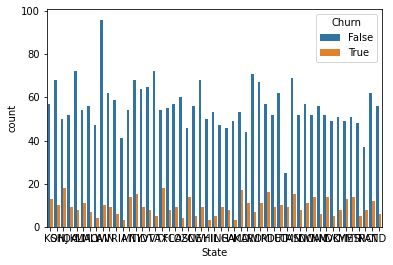

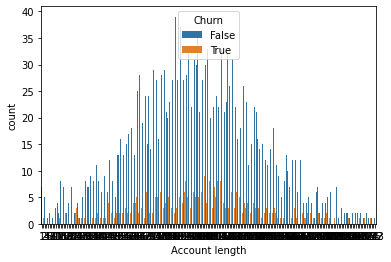

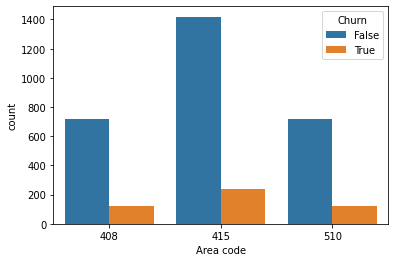

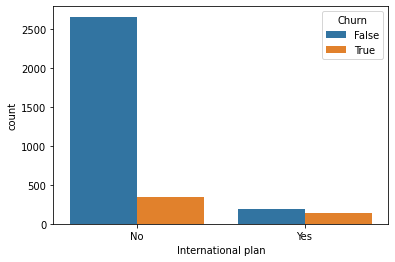

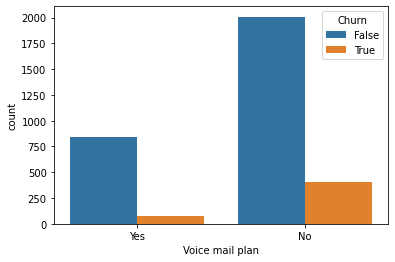

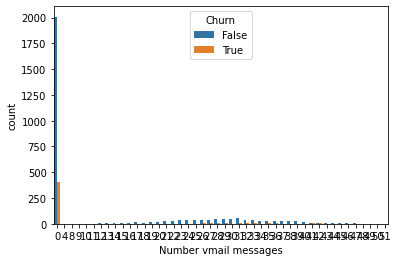

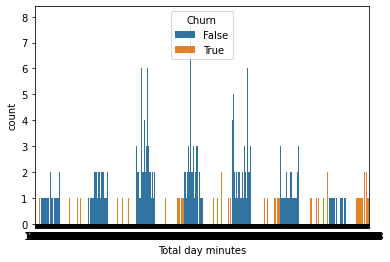

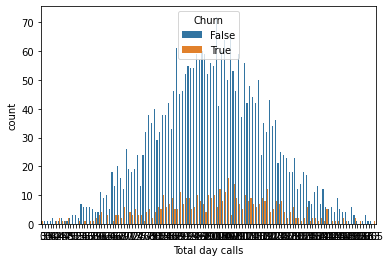

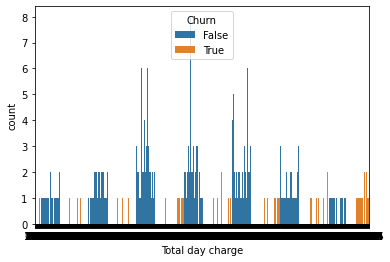

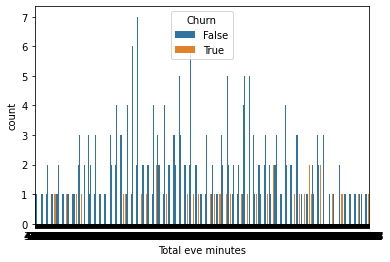

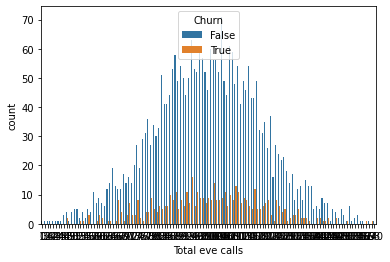

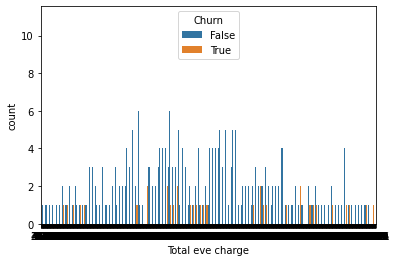

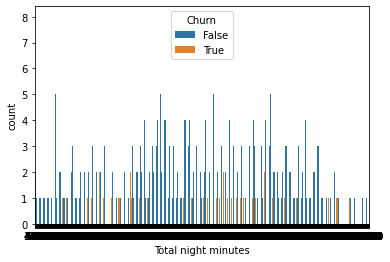

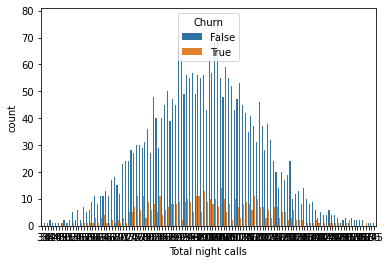

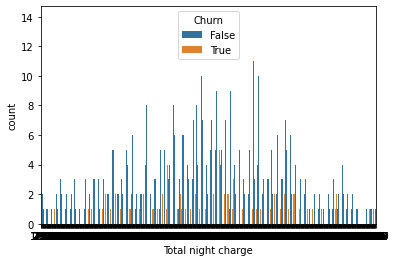

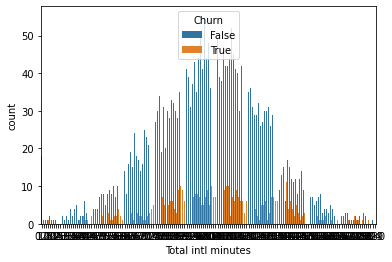

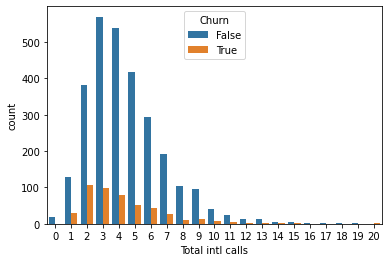

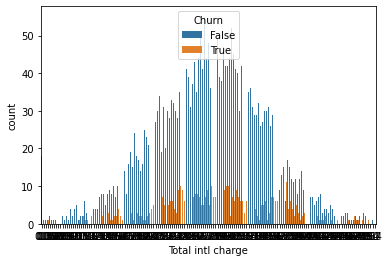

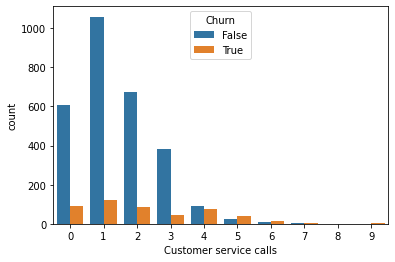

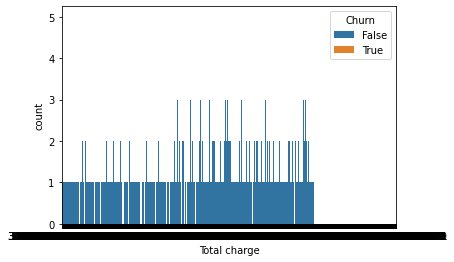

In [16]:
for i, predictor in enumerate(telco_dataset.drop(columns=['Churn'])):
    plt.figure(i)
    sns.countplot(data=telco_dataset, x=predictor, hue='Churn')

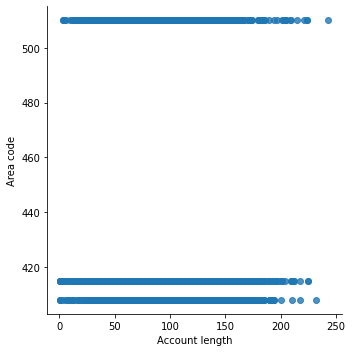

In [17]:
#Relationship between Account length and Area code
sns.lmplot(data=telco_dataset, x='Account length', y='Area code', fit_reg=False)

In [18]:
fig = px.box(telco_dataset, x="Churn", y=['Account length'], points="all")
fig.show()

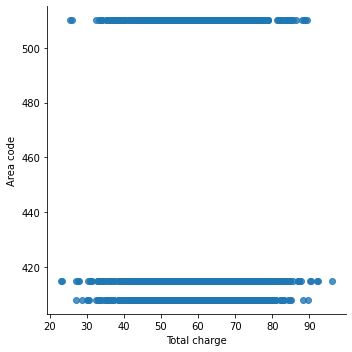

In [19]:
#Relationship between Total charge and Area code
sns.lmplot(data=telco_dataset, x='Total charge', y='Area code', fit_reg=False)

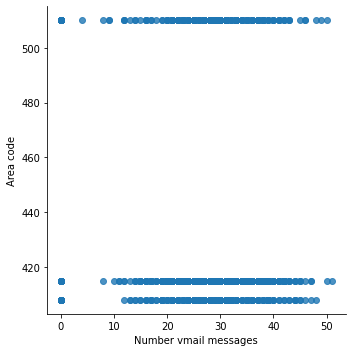

In [20]:
#Relationship between Number of vmail messages and Area code
sns.lmplot(data=telco_dataset, x='Number vmail messages', y='Area code', fit_reg=False)

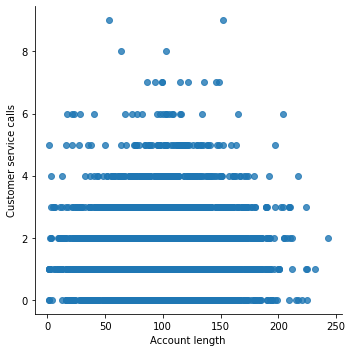

In [21]:
#Relationship between Account length and Customer service calls
sns.lmplot(data=telco_dataset, x='Account length', y='Customer service calls', fit_reg=False)

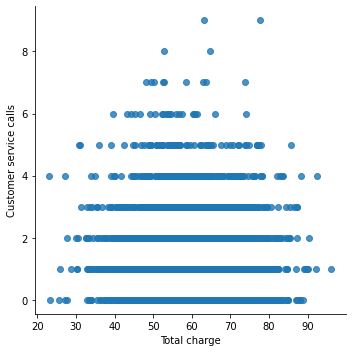

In [22]:
#Relationship between Total charge and customer service calls
sns.lmplot(data=telco_dataset, x='Total charge', y='Customer service calls', fit_reg=False)

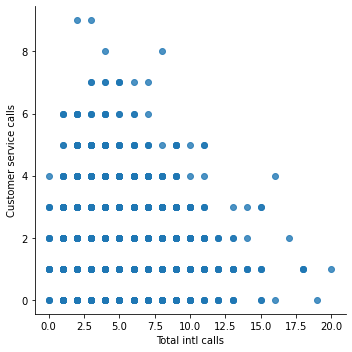

In [23]:
#Relationship between Total intl calls and Customer service calls
sns.lmplot(data=telco_dataset, x='Total intl calls', y='Customer service calls', fit_reg=False)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1157761a10>)

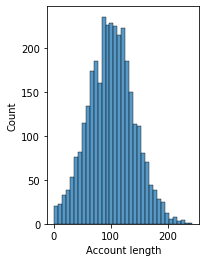

In [24]:
plt.figure(1), plt.subplot(121), sns.histplot(telco_dataset['Account length'])

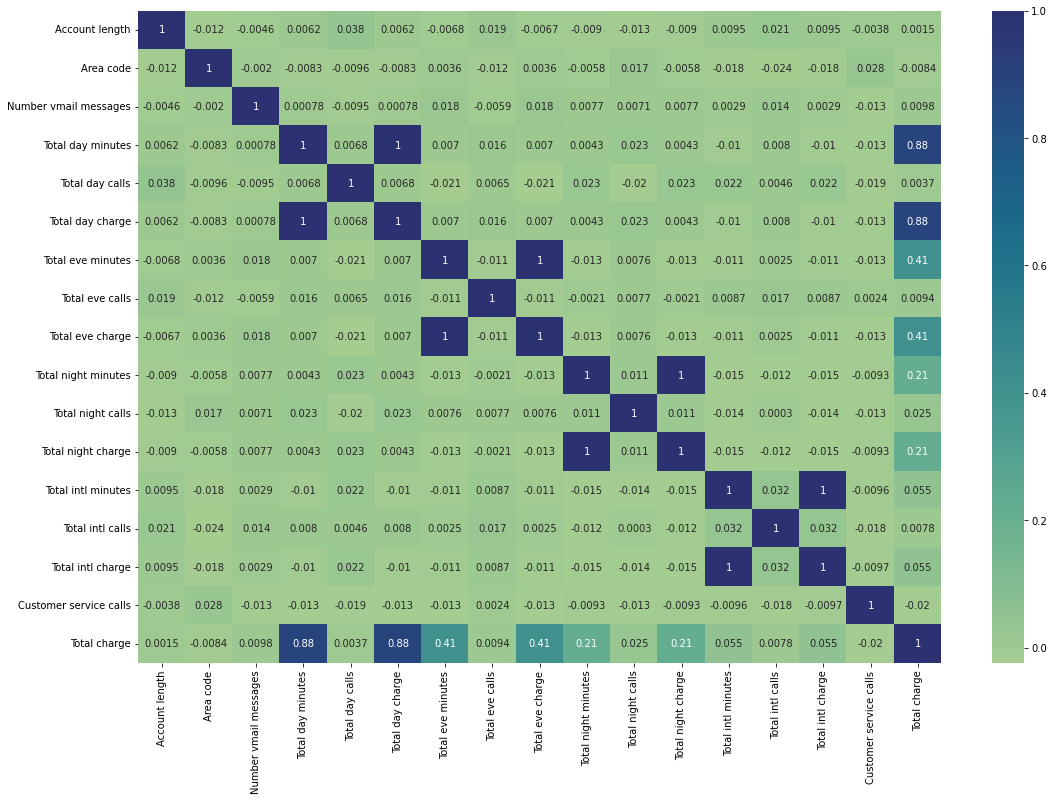

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(telco_dataset.corr() , annot =True,cmap='crest')

**Conclusion of Analysis**
1. Percentage of churn is 14.55
2. As can we saw in all cases day, eve and night the total minutes increase the total charge is also increase in that proportion.
3. Total calls and total charges are highly correlated to each other.
4. Customer service calls are not required for the more than 160 minutes calls during the day but less than 120 minutes calling required customer service call required.
5. More frequent CSC required for the internationl calling which are less than 12.5 minutes.
6. Churned customers have called more for customer service. Customer service can be improved to retain such customer